In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

In [ ]:
%cd 'drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары'

/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары


In [ ]:
#!ls 'Семинары'

In [ ]:
#tickers = ['AFLT', 'GMKN', 'LKOH','MAGN', 'ROSN', 'SBER', 'VTBR']
#LKOH = pd.read_csv('Котировки акций/'+ 'LKOH' +'_1day_01012017_01012022.txt', 
#                          delimiter=';', header=0, usecols=[0, 1, 2, 3, 7, 8])
#ROSN = pd.read_csv('Котировки акций/'+ 'ROSN' +'_1day_01012017_01012022.txt', 
#                          delimiter=';', header=0, usecols=[0, 1, 2, 3, 7, 8])
#ROSN

mvid = pd.read_csv('MVID_101001_171001.txt')
sber = pd.read_csv('SBER_101001_171001.txt')

sber.head(5)

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [ ]:
res = pd.merge(sber, mvid, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [ ]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


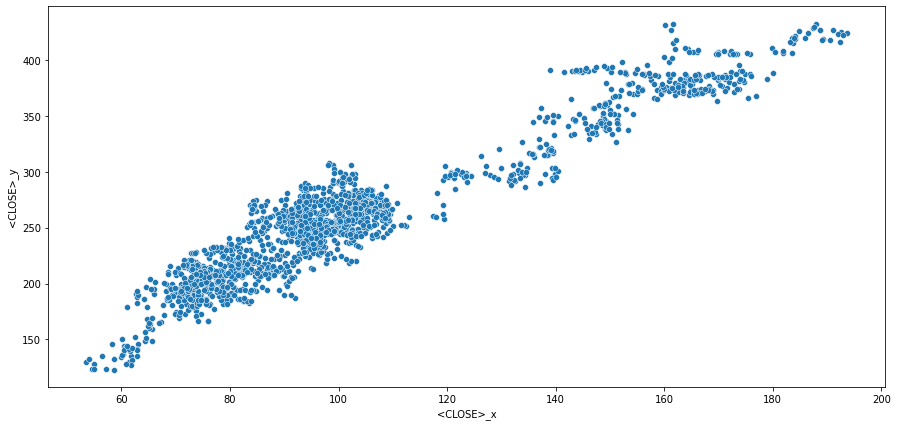

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.set(font_scale=1.3)
sns.scatterplot(x, y)

Мы видим, что в общем и целом, линейная зависимость прослеживается в данных.  Попробуем применить парную лин регрессию 

## Начнем строить класс, который будет реализовывать метод парной линейной регрессии:

In [ ]:
class hypothesis(object):
    """Модель парной линейной регрессии"""

    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x
        
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X))


    def df_split(self, X, Y, train_size=0.8):
      # Так как len(X) = len(Y)
      ind = np.arange(len(X))
      ind_train = np.random.choice(ind, int(len(X)*train_size))

      X_train, Y_train  = X[ind_train], Y[ind_train]
      X_test, Y_test = X[~np.isin(ind, ind_train)], Y[~np.isin(ind, ind_train)]
      return X_train, Y_train, X_test, Y_test


    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps=5000):

        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step < max_steps):
          dJ0 = sum(self.predict(X) - Y) /len(X)
          dJ1 = sum((self.predict(X) - Y) * X) /len(X)
          self.b0 -= alpha * dJ0
          self.b1 -= alpha * dJ1            
          old_err = new_err
          new_err = hyp.error(X, Y)
          dJ = abs(old_err - new_err) 
          step += 1            
          steps.append(step)
          errors.append(new_err)
        return steps, errors 

Давайте создадим объект регрессии и проверим начальное значение ошибки:

In [ ]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 36271.58344889084


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


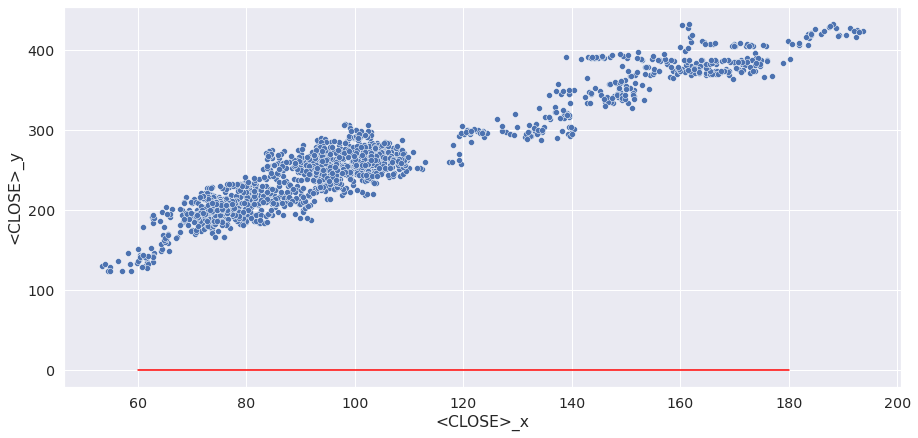

In [ ]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)

sns.set(font_scale=1.3)
plt.figure(figsize=(15, 7))
sns.scatterplot(x, y)
sns.lineplot(X0, Y0, color='red')

error after gradient descent: 298.76881676471504


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


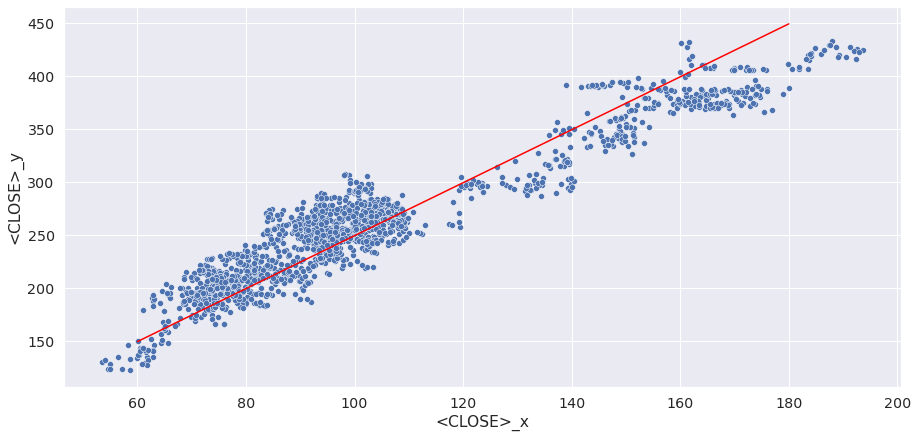

In [ ]:
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
print()

X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)

sns.set(font_scale=1.3)
plt.figure(figsize=(15, 7))
sns.scatterplot(x, y)
sns.lineplot(X0, Y0, color='red')

In [ ]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 298.76881676471504


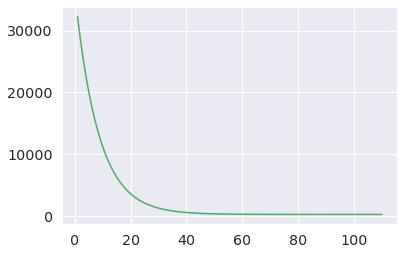

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

## Сплит выборки

In [ ]:
hyp = hypothesis()
hyp.df_split(x,y)

## **Линейная регрессия sklearn**

In [ ]:
x1 = x.to_numpy().reshape(-1, 1)
y1 = y.to_numpy().reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, train_size=0.75, random_state=42)

In [ ]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_test, y_test)

0.9131908819950576

In [ ]:
model.predict(X_test)

### **Различные метрики:**

In [ ]:
# Точность для тренировочных данных 

print(f'The R-squared value : {r2_score(y_train, model.predict(X_train))}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_train, model.predict(X_train)))}')
print(f'MAE : {mean_absolute_error(y_train, model.predict(X_train))}')

The R-squared value : 0.9101641605051622
RMSE : 18.60021177663942
MAE : 14.529940110917861


In [ ]:
# Точность для тестируемых данных

print(f'The R-squared value: {r2_score(y_test, model.predict(X_test))}') 
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, model.predict(X_test)))}')
print(f'MAE : {mean_absolute_error(y_test, model.predict(X_test))}')


The R-squared value: 0.9131908819950576
RMSE : 19.245805456839445
MAE : 14.87494211697731


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


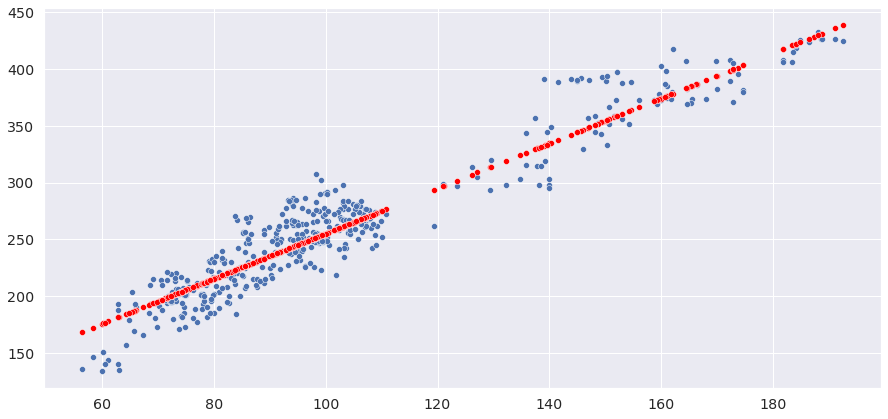

In [ ]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15, 7))

sns.scatterplot(X_test[:,0], y_test[:,0])
sns.scatterplot(X_test[:,0], model.predict(X_test)[:,0], color='red')